In [1]:
import pandas as pd
df = pd.read_json('../training.json')
df.head()

,title,entity,text,published,nasdaq_label,nyse_label,stock_published,+1day,stock_+1day,+1week,stock_+1week,+1month,stock_+1month,+3month,stock_+3month,+6month,stock_+6month
0,ANZ Bank New Zealand sells life insurance busi...,cigna corp,May 30 (Reuters) - ANZ Bank New Zealand on Wed...,1527637320000,None,"[CI, cigna corp, 0.0]",173.320007,1527723720000,169.369995,1528242120000,174.929993,1530315720000,169.949997,1535586120000,189.800003,1543534920000,213.130005
1,Australia's Westpac cleared of rate rigging bu...,westpac banking corp,SYDNEY (Reuters) - Australia’s Westpac Banking...,1527138840000,None,"[WBK, westpac banking corp, 0.0]",21.459999,1527225240000,21.309999,1527743640000,21.139999,1529817240000,21.799999,1535087640000,20.110001,1543036440000,19.070000
2,"Clear Channel Outdoor Holdings, Inc. Reports R...","clear channel outdoor holdings, inc.",SAN ANTONIO--(BUSINESS WIRE)-- Clear Channel O...,1526987700000,None,"[CCO, clear channel outdoor holdings, 0.0]",4.500000,1527074100000,4.450000,1527592500000,4.400000,1529666100000,4.650000,1534936500000,4.700000,1542885300000,5.860000
3,"Clear Channel Outdoor Holdings, Inc. Reports R...","clear channel outdoor holdings, inc",SAN ANTONIO--(BUSINESS WIRE)-- Clear Channel O...,1526987700000,None,"[CCO, clear channel outdoor holdings, 0.0]",4.500000,1527074100000,4.450000,1527592500000,4.400000,1529666100000,4.650000,1534936500000,4.700000,1542885300000,5.860000
4,BRIEF-Pembina Pipeline Corp Reports Q1 EPS $0.59,brief-pembina pipeline corp,May 3 (Reuters) - Pembina Pipeline Corp:\n* OR...,1525387380000,None,"[PBA, pembina pipeline cor, 0.0]",33.939999,1525473780000,33.939999,1525992180000,34.650002,1528065780000,34.459999,1533336180000,36.590000,1541284980000,33.070000


In [2]:
time_periods = [
    'published',
    '+1day',
    '+1week',
    '+1month',
    '+3month',
    '+6month'
]

train_df = df.drop(columns = time_periods)
train_df = train_df.drop(columns = ['entity','nasdaq_label','nyse_label'])


In [3]:
observations = [
    '+1day',
    '+1week',
    '+1month',
    '+3month',
    '+6month'
]
def build_train_df1(source_df):
    train_df1 = pd.DataFrame(train_df['title'])
    for observation in observations:
        train_df1[f'change_{observation}'] = ((train_df[f'stock_{observation}'] / train_df['stock_published']) - 1) * 100
        train_df1[f'change_{observation}'] = train_df1[f'change_{observation}'].apply(
            lambda x: min(x, 100)
        )
    return train_df1
train_df1  = build_train_df1(train_df)

In [4]:
train_df[train_df['stock_published'] == 0]
# No division by zero

,title,text,stock_published,stock_+1day,stock_+1week,stock_+1month,stock_+3month,stock_+6month


In [5]:
train_df = train_df[train_df['stock_published'].notna()]

In [6]:
import math
train_df[train_df.apply(
    lambda row: any(
        map(
            lambda observation: math.isnan(row.loc[f'stock_{observation}']),
            observations
        )
    ),
    axis=1
)]
# All NaN values shold be dropped

,title,text,stock_published,stock_+1day,stock_+1week,stock_+1month,stock_+3month,stock_+6month


In [7]:
train_df1 = build_train_df1(train_df)

In [8]:
train_df1

,title,change_+1day,change_+1week,change_+1month,change_+3month,change_+6month
0,ANZ Bank New Zealand sells life insurance busi...,-2.279028,0.928909,-1.944386,9.508421,22.969072
1,Australia's Westpac cleared of rate rigging bu...,-0.698973,-1.491145,1.584344,-6.290767,-11.136997
2,"Clear Channel Outdoor Holdings, Inc. Reports R...",-1.111115,-2.222220,3.333335,4.444440,30.222225
3,"Clear Channel Outdoor Holdings, Inc. Reports R...",-1.111115,-2.222220,3.333335,4.444440,30.222225
4,BRIEF-Pembina Pipeline Corp Reports Q1 EPS $0.59,0.000000,2.091936,1.532117,7.807901,-2.563344
...,...,...,...,...,...,...
56096,"Neiman Marcus CEO Retires, Ralph Lauren Exec L...",0.000000,7.398963,-3.336789,3.772020,10.093262
56097,ATM makers warn of 'jackpotting' hacks on U.S....,0.475060,-5.040908,-12.905778,-18.025864,-25.547639
56098,ATM makers warn of 'jackpotting' hacks on U.S....,3.013694,-4.109589,-13.972604,-11.506851,-40.547943
56099,Garmin Ltd. schedules its fourth quarter 2017 ...,0.317260,1.855962,3.442256,-4.949243,1.618015


In [9]:
# Legacy code
#train_df2 = train_df1[train_df1['change_+1day'] < 100]

(0, 500)

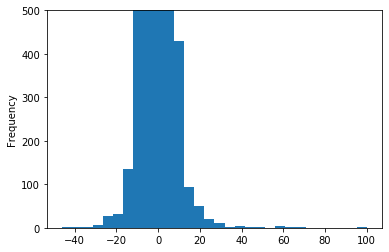

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
train_df1['change_+1day'].plot.hist(ax=ax, bins=30, bottom=0.1)
ax.set_ylim([0, 500])

In [11]:
# assuming we have change_{observation} defined
def change_labeling_1(source_df):
    df = source_df.copy()
    for observation in observations:
        df[f'type_1_positive_change_{observation}'] = df[f'change_{observation}'] > 0
        df[f'type_1_positive_change_{observation}'] = df[f'type_1_positive_change_{observation}'].astype(int)
    return df
change_labeling_1(train_df1)

,title,change_+1day,change_+1week,change_+1month,change_+3month,change_+6month,type_1_positive_change_+1day,type_1_positive_change_+1week,type_1_positive_change_+1month,type_1_positive_change_+3month,type_1_positive_change_+6month
0,ANZ Bank New Zealand sells life insurance busi...,-2.279028,0.928909,-1.944386,9.508421,22.969072,0,1,0,1,1
1,Australia's Westpac cleared of rate rigging bu...,-0.698973,-1.491145,1.584344,-6.290767,-11.136997,0,0,1,0,0
2,"Clear Channel Outdoor Holdings, Inc. Reports R...",-1.111115,-2.222220,3.333335,4.444440,30.222225,0,0,1,1,1
3,"Clear Channel Outdoor Holdings, Inc. Reports R...",-1.111115,-2.222220,3.333335,4.444440,30.222225,0,0,1,1,1
4,BRIEF-Pembina Pipeline Corp Reports Q1 EPS $0.59,0.000000,2.091936,1.532117,7.807901,-2.563344,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
56096,"Neiman Marcus CEO Retires, Ralph Lauren Exec L...",0.000000,7.398963,-3.336789,3.772020,10.093262,0,1,0,1,1
56097,ATM makers warn of 'jackpotting' hacks on U.S....,0.475060,-5.040908,-12.905778,-18.025864,-25.547639,1,0,0,0,0
56098,ATM makers warn of 'jackpotting' hacks on U.S....,3.013694,-4.109589,-13.972604,-11.506851,-40.547943,1,0,0,0,0
56099,Garmin Ltd. schedules its fourth quarter 2017 ...,0.317260,1.855962,3.442256,-4.949243,1.618015,1,1,1,0,1


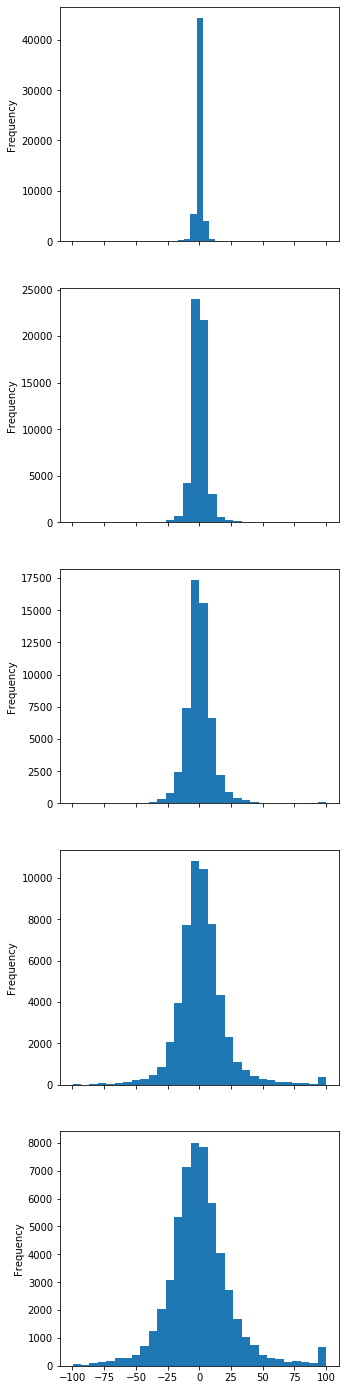

In [12]:
#def change_labeling_2(source_df):
fig, subplots = plt.subplots(nrows=len(observations),sharex=True,figsize=[5,25])
for index,observation in enumerate(observations):
    train_df1[f'change_{observation}'].plot.hist(bins=30, ax=subplots[index])

(0, 500)

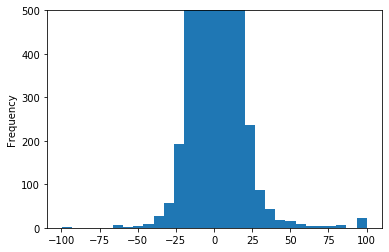

In [13]:
fig,ax = plt.subplots()
train_df1['change_+1week'].plot.hist(ax=ax, bins=30)
ax.set_ylim([0,500])

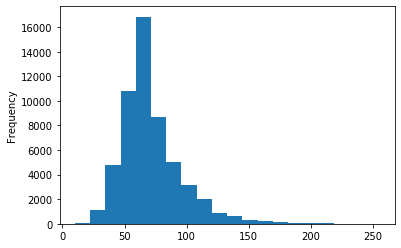

In [14]:
train_df1['title'].apply(lambda x: len(x)).plot.hist(bins=20)

In [15]:
train_df1

,title,change_+1day,change_+1week,change_+1month,change_+3month,change_+6month
0,ANZ Bank New Zealand sells life insurance busi...,-2.279028,0.928909,-1.944386,9.508421,22.969072
1,Australia's Westpac cleared of rate rigging bu...,-0.698973,-1.491145,1.584344,-6.290767,-11.136997
2,"Clear Channel Outdoor Holdings, Inc. Reports R...",-1.111115,-2.222220,3.333335,4.444440,30.222225
3,"Clear Channel Outdoor Holdings, Inc. Reports R...",-1.111115,-2.222220,3.333335,4.444440,30.222225
4,BRIEF-Pembina Pipeline Corp Reports Q1 EPS $0.59,0.000000,2.091936,1.532117,7.807901,-2.563344
...,...,...,...,...,...,...
56096,"Neiman Marcus CEO Retires, Ralph Lauren Exec L...",0.000000,7.398963,-3.336789,3.772020,10.093262
56097,ATM makers warn of 'jackpotting' hacks on U.S....,0.475060,-5.040908,-12.905778,-18.025864,-25.547639
56098,ATM makers warn of 'jackpotting' hacks on U.S....,3.013694,-4.109589,-13.972604,-11.506851,-40.547943
56099,Garmin Ltd. schedules its fourth quarter 2017 ...,0.317260,1.855962,3.442256,-4.949243,1.618015


In [16]:
change_labeling_1(train_df1).to_csv('training_w_labels1.csv')

In [17]:
def build_train_df2(source_df):
    train_df1 = pd.DataFrame(train_df['text'])
    for observation in observations:
        train_df1[f'change_{observation}'] = ((train_df[f'stock_{observation}'] / train_df['stock_published']) - 1) * 100
        train_df1[f'change_{observation}'] = train_df1[f'change_{observation}'].apply(
            lambda x: min(x, 100)
        )
    return train_df1
train_df2 = build_train_df2(train_df)
train_df2

,text,change_+1day,change_+1week,change_+1month,change_+3month,change_+6month
0,May 30 (Reuters) - ANZ Bank New Zealand on Wed...,-2.279028,0.928909,-1.944386,9.508421,22.969072
1,SYDNEY (Reuters) - Australia’s Westpac Banking...,-0.698973,-1.491145,1.584344,-6.290767,-11.136997
2,SAN ANTONIO--(BUSINESS WIRE)-- Clear Channel O...,-1.111115,-2.222220,3.333335,4.444440,30.222225
3,SAN ANTONIO--(BUSINESS WIRE)-- Clear Channel O...,-1.111115,-2.222220,3.333335,4.444440,30.222225
4,May 3 (Reuters) - Pembina Pipeline Corp:\n* OR...,0.000000,2.091936,1.532117,7.807901,-2.563344
...,...,...,...,...,...,...
56096,"By Phil Wahba January 5, 2018 \nNeiman Marcus ...",0.000000,7.398963,-3.336789,3.772020,10.093262
56097,"(Reuters) - Diebold Nixdorf Inc and NCR Corp, ...",0.475060,-5.040908,-12.905778,-18.025864,-25.547639
56098,"(Reuters) - Diebold Nixdorf Inc and NCR Corp, ...",3.013694,-4.109589,-13.972604,-11.506851,-40.547943
56099,"SCHAFFHAUSEN, Switzerland--(BUSINESS WIRE)-- G...",0.317260,1.855962,3.442256,-4.949243,1.618015


In [18]:
change_labeling_1(train_df2).to_csv('full_text_w_labels1.csv')

In [19]:
test = train_df2[train_df2['text'].apply(lambda x: len(x)) < 2000]

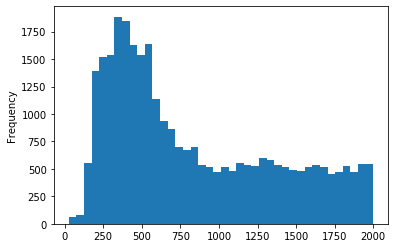

In [20]:
test['text'].apply(lambda x: len(x)).plot.hist(bins=40)

In [21]:
cleaning = train_df2['text'].str.split().apply(lambda x: x[:5])
cleaning[
    cleaning.apply(lambda words: '(Reuters)' in words)
].shape[0] / train_df.shape[0]

0.28367402562005994

In [22]:
train_df2

,text,change_+1day,change_+1week,change_+1month,change_+3month,change_+6month
0,May 30 (Reuters) - ANZ Bank New Zealand on Wed...,-2.279028,0.928909,-1.944386,9.508421,22.969072
1,SYDNEY (Reuters) - Australia’s Westpac Banking...,-0.698973,-1.491145,1.584344,-6.290767,-11.136997
2,SAN ANTONIO--(BUSINESS WIRE)-- Clear Channel O...,-1.111115,-2.222220,3.333335,4.444440,30.222225
3,SAN ANTONIO--(BUSINESS WIRE)-- Clear Channel O...,-1.111115,-2.222220,3.333335,4.444440,30.222225
4,May 3 (Reuters) - Pembina Pipeline Corp:\n* OR...,0.000000,2.091936,1.532117,7.807901,-2.563344
...,...,...,...,...,...,...
56096,"By Phil Wahba January 5, 2018 \nNeiman Marcus ...",0.000000,7.398963,-3.336789,3.772020,10.093262
56097,"(Reuters) - Diebold Nixdorf Inc and NCR Corp, ...",0.475060,-5.040908,-12.905778,-18.025864,-25.547639
56098,"(Reuters) - Diebold Nixdorf Inc and NCR Corp, ...",3.013694,-4.109589,-13.972604,-11.506851,-40.547943
56099,"SCHAFFHAUSEN, Switzerland--(BUSINESS WIRE)-- G...",0.317260,1.855962,3.442256,-4.949243,1.618015


In [24]:
def build_train_df3(source_df):
    train_df1 = source_df.copy()
    train_df1 = train_df1[['title', 'text']]
    for observation in observations:
        train_df1[f'change_{observation}'] = ((train_df[f'stock_{observation}'] / train_df['stock_published']) - 1) * 100
        train_df1[f'change_{observation}'] = train_df1[f'change_{observation}'].apply(
            lambda x: min(x, 100)
        )
    return train_df1
bert_df = build_train_df3(train_df)
bert_df = change_labeling_1(bert_df)
print(bert_df)
bert_df = bert_df[['title','text','type_1_positive_change_+1day','type_1_positive_change_+1week']].rename(columns={
    'type_1_positive_change_+1day': 'positive_change_+1day',
    'type_1_positive_change_+1week': 'positive_change_+1week'
})
for label_group in ['+1day','+1week']:
    bert_df = bert_df.rename(columns={
        f'type_1_positive_change_{label_group}': f'positive_change_{label_group}',
    })
    bert_df[f'negative_change_{label_group}'] = 1 - bert_df[f'positive_change_{label_group}']
reordered_cols = ['title'] + [ f'{pn}_change_{label_group}' for label_group in ['+1day','+1week'] for pn in ['positive','negative']]
bert_df = bert_df[reordered_cols]
#from dateparser import parse
#train_df2['text'].apply(lambda text: date)

                                                   title  \
0      ANZ Bank New Zealand sells life insurance busi...   
1      Australia's Westpac cleared of rate rigging bu...   
2      Clear Channel Outdoor Holdings, Inc. Reports R...   
3      Clear Channel Outdoor Holdings, Inc. Reports R...   
4       BRIEF-Pembina Pipeline Corp Reports Q1 EPS $0.59   
...                                                  ...   
56096  Neiman Marcus CEO Retires, Ralph Lauren Exec L...   
56097  ATM makers warn of 'jackpotting' hacks on U.S....   
56098  ATM makers warn of 'jackpotting' hacks on U.S....   
56099  Garmin Ltd. schedules its fourth quarter 2017 ...   
56100  Garmin Ltd. schedules its fourth quarter 2017 ...   

                                                    text  change_+1day  \
0      May 30 (Reuters) - ANZ Bank New Zealand on Wed...     -2.279028   
1      SYDNEY (Reuters) - Australia’s Westpac Banking...     -0.698973   
2      SAN ANTONIO--(BUSINESS WIRE)-- Clear Channel O... 

In [25]:
bert_df.to_csv('bert_training_data.csv')